In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

file_path = r'C:\Users\yaawa\Desktop\Algorithmic_Trading_Backtesting\data\close_prices.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"Error: The file {file_path} does not exist.")
    df = pd.DataFrame()  # Create an empty DataFrame as a fallback

In [20]:
df

,Date,AAPL,KO,SPY
0,2010-01-04,7.643214,28.520000,113.330002
1,2010-01-05,7.656429,28.174999,113.629997
2,2010-01-06,7.534643,28.165001,113.709999
3,2010-01-07,7.520714,28.094999,114.190002
4,2010-01-08,7.570714,27.575001,114.570000
...,...,...,...,...
2764,2020-12-24,131.970001,53.439999,369.000000
2765,2020-12-28,136.690002,54.160000,372.170013
2766,2020-12-29,134.869995,54.130001,371.459991
2767,2020-12-30,133.720001,54.439999,371.989990


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2769 non-null   object 
 1   AAPL    2769 non-null   float64
 2   KO      2769 non-null   float64
 3   SPY     2769 non-null   float64
dtypes: float64(3), object(1)
memory usage: 86.7+ KB
None


In [22]:
print(df.describe())

              AAPL           KO          SPY
count  2769.000000  2769.000000  2769.000000
mean     33.777537    41.320121   207.676797
std      24.572747     6.808527    67.240791
min       6.858929    25.014999   102.199997
25%      17.484285    37.660000   141.559998
50%      26.987499    41.759998   205.210007
75%      43.007500    45.549999   265.339996
max     136.690002    60.130001   373.880005


In [24]:
# import matplotlib.pyplot as plt

# # Plot bid[0] and ask[0] prices over time
# plt.figure(figsize=(10, 6))
# plt.plot(df['time'], df['bid[0]'], label='Bid Price', color='blue')
# plt.plot(df['time'], df['ask[0]'], label='Ask Price', color='red')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.title('Bid Price vs. Ask Price Over Time')
# plt.legend()
# plt.grid(True)
# plt.show()


In [25]:
# Calculate bid-ask spread for each row
df['bid_ask_spread'] = df['ask[0]'] - df['bid[0]']

# Plot bid-ask spread over time
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['bid_ask_spread'], label='Bid-Ask Spread', color='green')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.title('Bid-Ask Spread Over Time')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'ask[0]'

C:\Users\yaawa\AppData\Local\Temp\ipykernel_8128\2265040528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_book_imbalance'] = df['bid_size[0]'] - df['ask_size[0]']


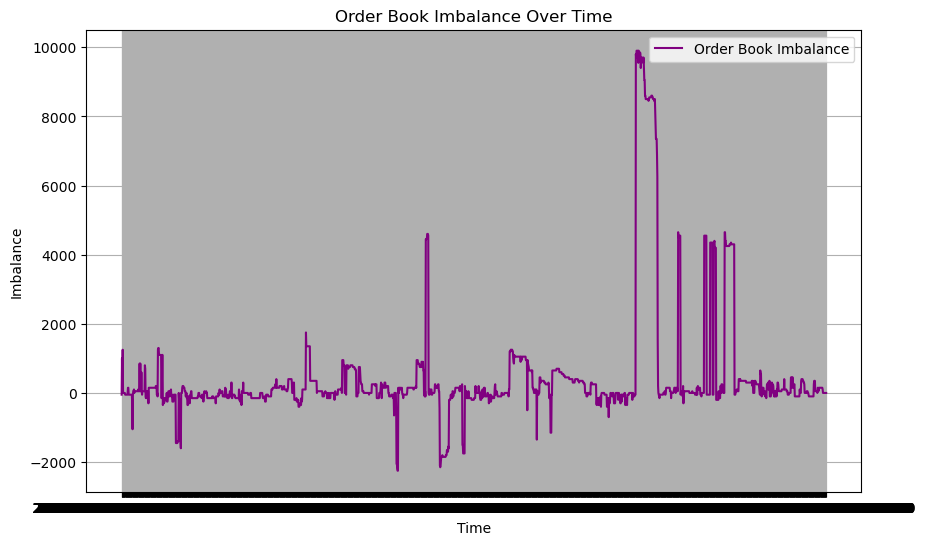

In [12]:
# Calculate order book imbalance at each level
df['order_book_imbalance'] = df['bid_size[0]'] - df['ask_size[0]']

# Plot order book imbalance over time
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['order_book_imbalance'], label='Order Book Imbalance', color='purple')
plt.xlabel('Time')
plt.ylabel('Imbalance')
plt.title('Order Book Imbalance Over Time')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\yaawa\AppData\Local\Temp\ipykernel_8128\3436948690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_change'] = df['bid[0]'].diff()


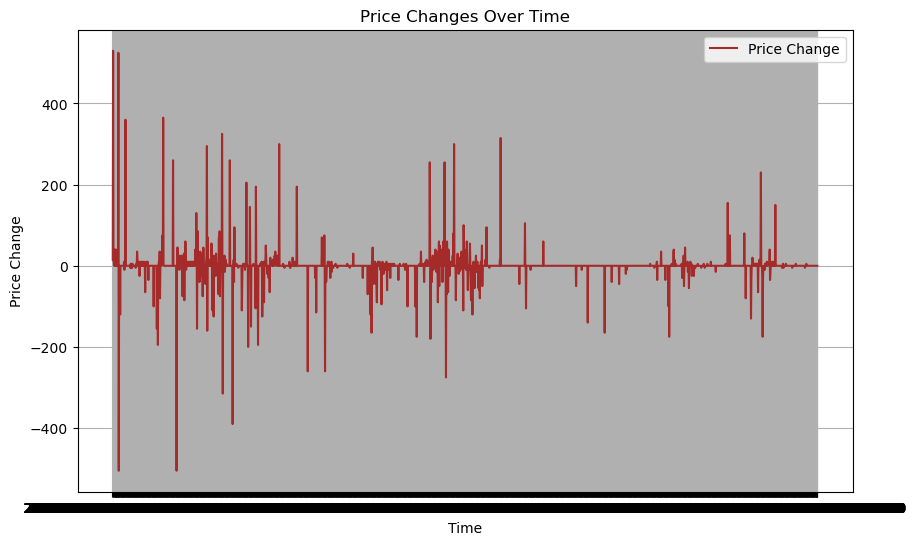

In [13]:
# Calculate price changes between consecutive timestamps
df['price_change'] = df['bid[0]'].diff()

# Plot price changes over time
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['price_change'], label='Price Change', color='brown')
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\yaawa\AppData\Local\Temp\ipykernel_8128\89369471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma_bid'] = df['bid[0]'].rolling(window=5).mean()
C:\Users\yaawa\AppData\Local\Temp\ipykernel_8128\89369471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma_ask'] = df['ask[0]'].rolling(window=5).mean()


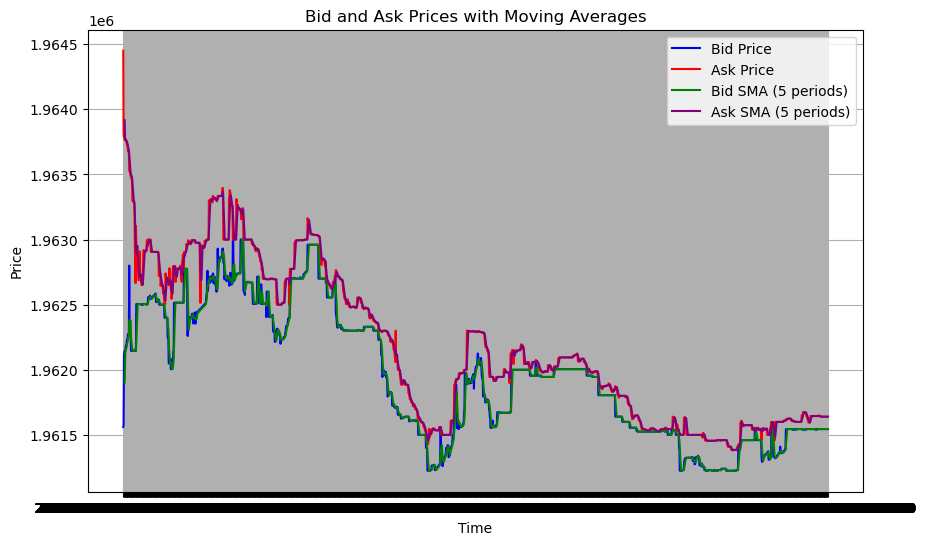

In [14]:
# Calculate 5-period simple moving average for bid and ask prices
df['sma_bid'] = df['bid[0]'].rolling(window=5).mean()
df['sma_ask'] = df['ask[0]'].rolling(window=5).mean()

# Plot bid and ask prices along with their moving averages
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['bid[0]'], label='Bid Price', color='blue')
plt.plot(df['time'], df['ask[0]'], label='Ask Price', color='red')
plt.plot(df['time'], df['sma_bid'], label='Bid SMA (5 periods)', color='green')
plt.plot(df['time'], df['sma_ask'], label='Ask SMA (5 periods)', color='purple')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bid and Ask Prices with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import backtrader as bt
import pandas as pd

class DataFrameData(bt.feeds.PandasData):
    lines = ('bid_size[0]', 'bid[0]', 'ask[0]', 'ask_size[0]')  # Define the columns used in the strategy

class MovingAverageCrossover(bt.Strategy):
    params = (('fast_period', 10), ('slow_period', 30))

    def __init__(self):
        self.fast_ma = bt.indicators.SMA(self.data.bid[0], period=self.params.fast_period)
        self.slow_ma = bt.indicators.SMA(self.data.ask[0], period=self.params.slow_period)

    def next(self):
        if self.fast_ma[0] > self.slow_ma[0] and self.fast_ma[-1] <= self.slow_ma[-1]:
            self.buy()
        elif self.fast_ma[0] < self.slow_ma[0] and self.fast_ma[-1] >= self.slow_ma[-1]:
            self.sell()

if __name__ == '__main__':
    # Load the data into a DataFrame
    df = pd.read_csv('data.csv', parse_dates=['time'], index_col='time')

    # Convert DataFrame to backtrader data feed
    data = DataFrameData(dataname=df)

    # Initialize backtrader Cerebro engine
    cerebro = bt.Cerebro()

    # Add the data feed to Cerebro
    cerebro.adddata(data)

    # Add the strategy to Cerebro
    cerebro.addstrategy(MovingAverageCrossover, fast_period=5, slow_period=20)

    # Set initial cash and commission (0.1%)
    cerebro.broker.set_cash(10000)
    cerebro.broker.setcommission(commission=0.001)

    # Print the starting cash
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run the backtest
    cerebro.run()

    # Print the ending cash
    print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the backtest results
    cerebro.plot(style='candle')


In [23]:
import backtrader as bt
import pandas as pd

class DataFrameData(bt.feeds.PandasData):
    lines = ('bid_size[0]', 'bid[0]', 'ask[0]', 'ask_size[0]')  # Define the columns used in the strategy

class MovingAverageCrossover(bt.Strategy):
    params = (('fast_period', 10), ('slow_period', 30))

    def __init__(self):
        self.fast_ma = bt.indicators.SMA(self.data.bid[0], period=self.params.fast_period)
        self.slow_ma = bt.indicators.SMA(self.data.ask[0], period=self.params.slow_period)

    def next(self):
        if self.fast_ma[0] > self.slow_ma[0] and self.fast_ma[-1] <= self.slow_ma[-1]:
            self.buy()
        elif self.fast_ma[0] < self.slow_ma[0] and self.fast_ma[-1] >= self.slow_ma[-1]:
            self.sell()

if __name__ == '__main__':
    # Load the data into a DataFrame
    df = pd.read_csv('data.csv', parse_dates=['time'], index_col='time')

    # Convert DataFrame to backtrader data feed
    data = DataFrameData(dataname=df)

    # Initialize backtrader Cerebro engine
    cerebro = bt.Cerebro()

    # Add the data feed to Cerebro
    cerebro.adddata(data)

    # Add the strategy to Cerebro
    cerebro.addstrategy(MovingAverageCrossover, fast_period=5, slow_period=20)

    # Set initial cash and commission (0.1%)
    cerebro.broker.set_cash(10000)
    cerebro.broker.setcommission(commission=0.001)

    # Print the starting cash
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run the backtest
    cerebro.run()

    # Print the ending cash
    print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the backtest results
    cerebro.plot(style='candle')
